# Imports

In [1]:
from fastbook import *
from fastai.vision.widgets import *

# Loading the model

In [2]:
#checking if the file exists
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [3]:
learn_inf= load_learner('export.pkl')

# Creating a Notebook App from the Model

We will use IPython widgets (ipywidgets) and Voilà to create a Notebook App. Let's build the GUI step by step.

### Uploading a picture

In [14]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

### Grabbing the image that we uploaded earlier

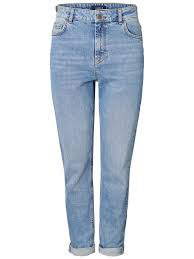

In [15]:
#we can grab the image and display it on the Jupyter Notebook
img = PILImage.create(btn_upload.data[-1])
img

In [16]:
#Let's display it using an output widget
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

# Make predictions

In [17]:
pred,pred_idx,probs = learn_inf.predict(img)

In [18]:
# In order to display our predictions we can use a label widget.
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: jeans; Probability: 1.0000')

# Creating a button so that the user can make a prediction

In [19]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

Now we need to create a function that predict the image uploaded previously, so that when the user click on Classify, it will make the prediction.

In [20]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)


# Putting everything in a Vertical Box (VBOX)

In [22]:
VBox([widgets.Label('Select one of your favorite piece of clothing'), 
      btn_upload, btn_run, out_pl, lbl_pred])